In [1]:
import numpy as np
import pandas as pd
from sklearn . preprocessing import LabelEncoder , MinMaxScaler

In [2]:
names = ['duration', 'protocol', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land','wrong_fragment', 'urgent', 'hot',
         'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
         'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
         'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
         'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', ' dst_host_count', 'dst_host_srv_count',
         'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', ' dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
         'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
         'attack_type', 'other']

In [3]:
df = pd. read_csv ('KDDTrain+.txt', names =names , header = None )
dft = pd. read_csv ('KDDTest+.txt', names =names , header = None )
print ("Initial test and training data shapes :", df.shape , dft . shape )

Initial test and training data shapes : (125973, 43) (22544, 43)


In [4]:
full = pd. concat ([df , dft ])
assert full . shape [0] == df. shape [0] + dft. shape [0]

In [5]:
full.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
full ['label'] = full ['attack_type']

In [7]:
full.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,other,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [8]:
# DoS attacks
full . loc [ full . label == 'neptune', 'label'] = 'dos '
full . loc [ full . label == 'back', 'label'] = 'dos'
full . loc [ full . label == 'land', 'label'] = 'dos'
full . loc [ full . label == 'pod', 'label'] = 'dos'
full . loc [ full . label == 'smurf', 'label'] = 'dos'
full . loc [ full . label == 'teardrop', 'label'] = 'dos'
full . loc [ full . label == 'mailbomb', 'label'] = 'dos'
full . loc [ full . label == 'processtable', 'label'] = 'dos'
full . loc [ full . label == 'udpstorm', 'label'] = 'dos'
full . loc [ full . label == 'apache2', 'label'] = 'dos'
full . loc [ full . label == 'worm', 'label'] = 'dos'

# User -to - Root ( U2R )
full . loc [ full . label == 'buffer_overflow', 'label'] = 'u2r'
full . loc [ full . label == 'loadmodule', 'label'] = 'u2r'
full . loc [ full . label == 'perl', 'label'] = 'u2r'
full . loc [ full . label == 'rootkit', 'label'] = 'u2r'
full . loc [ full . label == 'sqlattack', 'label'] = 'u2r'
full . loc [ full . label == 'xterm', 'label'] = 'u2r'
full . loc [ full . label == 'ps', 'label'] = 'u2r'

# Remote -to - Local ( R2L)
full . loc [ full . label == 'ftp_write', 'label'] = 'r2l'
full . loc [ full . label == 'guess_passwd', 'label'] = 'r2l'
full . loc [ full . label == 'imap', 'label'] = 'r2l'
full . loc [ full . label == 'multihop', 'label'] = 'r2l'
full . loc [ full . label == 'phf', 'label'] = 'r2l'
full . loc [ full . label == 'spy', 'label'] = 'r2l'
full . loc [ full . label == 'warezclient', 'label'] = 'r2l'
full . loc [ full . label == 'warezmaster', 'label'] = 'r2l'
full . loc [ full . label == 'xlock', 'label'] = 'r2l'
full . loc [ full . label == 'xsnoop', 'label'] = 'r2l'
full . loc [ full . label == 'snmpgetattack', 'label'] = 'r2l'
full . loc [ full . label == 'httptunnel', 'label'] = 'r2l'
full . loc [ full . label == 'snmpguess', 'label'] = 'r2l'
full . loc [ full . label == 'sendmail', 'label'] = 'r2l'
full . loc [ full . label == 'named', 'label'] = 'r2l'

# Probe attacls
full . loc [ full . label == 'satan', 'label'] = 'probe'
full . loc [ full . label == 'ipsweep', 'label'] = 'probe'
full . loc [ full . label == 'nmap', 'label'] = 'probe'
full . loc [ full . label == 'portsweep', 'label'] = 'probe'
full . loc [ full . label == 'saint', 'label'] = 'probe'
full . loc [ full . label == 'mscan', 'label'] = 'probe'

full = full . drop ([ 'other', 'attack_type'], axis =1)
print ("Unique labels ", full . label . unique ())

Unique labels  ['normal' 'dos ' 'r2l' 'probe' 'dos' 'u2r']


In [9]:
full.head()

,duration,protocol,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
# Generate One -Hot encoding
full2 = pd. get_dummies (full , drop_first = False )

In [11]:
full2.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,label_dos,label_dos,label_normal,label_probe,label_r2l,label_u2r
0,0,491,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
full2['label_dos'] = full2.iloc[:,-5]+full2.iloc[:,-6]
full2.drop(full2.columns[-6], axis=1)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label_dos,label_normal,label_probe,label_r2l,label_u2r
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# Separate training and test sets again
features = list ( full2 . columns [: -5])
y_train = np. array ( full2 [0: df. shape [0]][[ 'label_normal', 'label_dos', 'label_probe', 'label_r2l', 'label_u2r']])
X_train = full2 [0: df. shape [0]][ features ]
y_test = np. array ( full2 [df. shape [0]:][[ 'label_normal', 'label_dos', 'label_probe', 'label_r2l', 'label_u2r']])
X_test = full2 [df. shape [0]:][ features ]

In [14]:
# Scale data
scaler = MinMaxScaler ().fit( X_train )
X_train_scaled = np. array ( scaler . transform ( X_train ))
X_test_scaled = np. array ( scaler . transform ( X_test ))

In [15]:
# Generate label encoding for Logistic regression
labels = full . label . unique ()
le = LabelEncoder ()
le. fit ( labels )
y_full = le. transform ( full . label )
y_train_l = y_full [0: df. shape [0]]
y_test_l = y_full [df. shape [0]:]

In [16]:
print (" Training dataset shape ", X_train_scaled .shape , y_train . shape )
print (" Test dataset shape ", X_test_scaled .shape , y_test . shape )
print (" Label encoder y shape ", y_train_l .shape , y_test_l . shape )

 Training dataset shape  (125973, 123) (125973, 5)
 Test dataset shape  (22544, 123) (22544, 5)
 Label encoder y shape  (125973,) (22544,)


In [17]:
X_train_scaled.shape

(125973, 123)

In [18]:
y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ..., 
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score , roc_curve , auc , f1_score
from sklearn.svm import SVC, LinearSVC

In [20]:
clf = OneVsRestClassifier ( LinearSVC (C=1. , random_state =42 , loss ='hinge'))
clf.fit( X_train_scaled, y_train )

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0),
          n_jobs=1)

In [21]:
y_pred = clf.predict(X_test_scaled)

In [22]:
fpr_sv , tpr_sv , _ = roc_curve ( y_test [:, 0], y_pred [:, 0])
roc_auc_sv = auc (fpr_sv , tpr_sv )
print (" Accuracy score :", accuracy_score (y_test , y_pred ))
print (" F1 score :", f1_score ( y_test , y_pred , average ='micro'))
print (" AUC score :", roc_auc_sv )

 Accuracy score : 0.80442689851
 F1 score : 0.82061919368
 AUC score : 0.833176770966


c:\programdata\anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location " lower right ". Falling back on "best"; valid locations are
	upper right
	center left
	right
	upper center
	lower right
	best
	upper left
	center right
	lower center
	lower left
	center

  six.iterkeys(self.codes))))


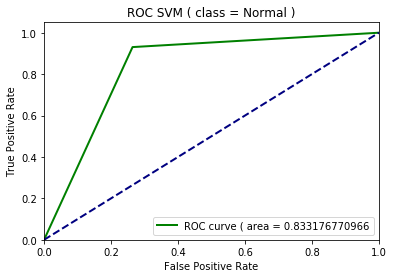

In [23]:
import matplotlib.pyplot as plt
lw = 2
plt . plot (fpr_sv, tpr_sv, color ='green', lw=lw, label='ROC curve ( area = ' + str(roc_auc_sv))
plt . plot ([0 , 1], [0, 1], color ='navy', lw=lw , linestyle ='--')
plt . xlim ([0.0 , 1.0])
plt . ylim ([0.0 , 1.05])
plt . xlabel ('False Positive Rate')
plt . ylabel ('True Positive Rate')
plt . title ('ROC SVM ( class = Normal )')
plt . legend (loc=" lower right ")
plt.show()

In [24]:
clf = SVC(kernel = 'linear')
clf.fit( X_train_scaled, y_train_l)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y_pred = clf.predict(X_test_scaled)

In [26]:
print (" Accuracy score :", accuracy_score (y_test_l , y_pred ))

 Accuracy score : 0.80535841022


In [27]:
clf = SVC(kernel = 'rbf')
clf.fit( X_train_scaled, y_train_l)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred = clf.predict(X_test_scaled)
print (" Accuracy score :", accuracy_score (y_test_l , y_pred ))

 Accuracy score : 0.783800567779
